In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import os
import collections
import math
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
path=os.getcwd()
features=pd.read_csv(path+'/total_extracted_features.csv',encoding="shift-jis",keep_default_na=False)
print(features.head())

   difficulty     word  len     vrlen  brownfq  reuterfq  weblio   binglog  \
0           3  dismiss    7  0.285714        0         0     1.0  7.250420   
1           3  liberty    7  0.285714        0         0     1.0  8.033424   
2           3    sadly    5  0.200000        0         0     1.0  7.579784   
3           3  absence    7  0.428571        0         0     4.0  7.096910   
4           3  display    7  0.285714        0         0     1.0  7.287802   

    yahoolog  googlelog  gutenfq  pos  
0   9.012837   9.012837       10    3  
1  10.402605  10.402605      102    1  
2  10.247482  10.104828       38    7  
3   7.986324   8.008600       66    3  
4   9.012837   9.008600       16    1  


In [3]:
feature_list = ['len', 'vrlen', 'brownfq', 'reuterfq', 'weblio', 'binglog', 'yahoolog', 'googlelog', 'gutenfq','pos']

for i in feature_list:
    features[i] = (features[i]-features[i].min())/(features[i].max()-features[i].min())
    #features[i] = (features[i]-features[i].mean())/features[i].std()
print(features.head())

   difficulty     word       len     vrlen  brownfq  reuterfq    weblio  \
0           3  dismiss  0.352941  0.285714      0.0       0.0  0.000000   
1           3  liberty  0.352941  0.285714      0.0       0.0  0.000000   
2           3    sadly  0.235294  0.200000      0.0       0.0  0.000000   
3           3  absence  0.352941  0.428571      0.0       0.0  0.103448   
4           3  display  0.352941  0.285714      0.0       0.0  0.000000   

    binglog  yahoolog  googlelog   gutenfq       pos  
0  0.686998  0.772638   0.782791  0.000080  0.333333  
1  0.858503  1.000000   1.000000  0.000811  0.000000  
2  0.759140  0.974622   0.953460  0.000302  1.000000  
3  0.653374  0.604703   0.625836  0.000525  0.333333  
4  0.695185  0.772638   0.782128  0.000127  0.000000  


In [4]:
new_labelList=[]
labelList = features['difficulty']
for i in range(0, len(features['difficulty'])):
    if labelList[i] in [1, 2, 3, 4]:
        new_labelList.append(1)
    if labelList[i] in [5, 6, 7, 8]:
        new_labelList.append(2)
    if labelList[i] in [9, 10, 11, 12]:
        new_labelList.append(3)
features['difficulty'] = new_labelList

0.759969892282


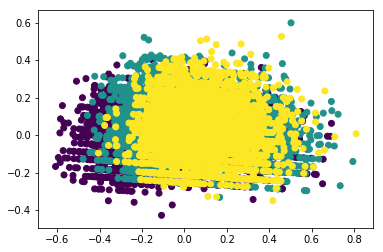

In [12]:
# Let's sort the features according to difficulty
features.sort_values(by=['difficulty'], inplace=True)

# Let's plot them

#feature_list_pca = ['weblio', 'googlelog', 'gutenfq']#,'pos']
feature_list_pca = ['len', 'vrlen', 'brownfq', 'reuterfq', 'weblio', 'binglog', 'yahoolog', 'googlelog', 'gutenfq']
#feature_list_pca = ['len', 'vrlen', 'weblio', 'googlelog', 'gutenfq']
featuresList = features.loc[:, feature_list_pca]
labelList = features.loc[:, 'difficulty']
        
pca1 = PCA(n_components=2)
pca1.fit(featuresList)

featuresList_proj=pca1.fit_transform(featuresList)

print (np.sum(pca1.explained_variance_ratio_))

#plot the PC as a scatter plot
plt.scatter(featuresList_proj[:,0], featuresList_proj[:,1], c=labelList)
#plt.colorbar()

plt.show()

In [13]:
clf_rbf=SVC(kernel='rbf', gamma=0.1, C=10)
    
print(cross_val_score(clf_rbf, featuresList, labelList, cv=5))

[ 0.3475      0.37416667  0.45125     0.62291667  0.69182652]
